### Шмидт Ян, 304 гр., 2023, Вариант 9
$$f(x) = 3 \cos\left(\dfrac{3x}{2}\right) e\left(\dfrac{x}{4}\right) + 4 \sin\left(\dfrac{7x}{2}\right) e(−3x) + 4x$$

$$a=2.5, b=3.3, \alpha=\dfrac{2}{3}, \beta=0$$
# Часть 1. Квадратурные формулы (КФ) Ньютона-Котеса и Гаусса

## Часть 1.1. Посчитать интеграл с использованием составных квадратурных формул (СКФ): 
<i> 1) средних и 2) левых прямоугольников, 3) трапеции, 4) Симпсона </i>
### Подынтегральная функция — $f(x)$ из своего варианта ($p(x) \equiv 1$):
Посчитать $$\int_{a}^{b} f(x) dx = \int_{2.5}^{3.3} \left[3 \cos\left(\dfrac{3x}{2}\right) e\left(\dfrac{x}{4}\right) + 4 \sin\left(\dfrac{7x}{2}\right) e(−3x) + 4x\right] dx$$

In [507]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Функция из задания

In [508]:
def f(x):
    return 3*np.cos(3*x/2)*np.exp(x/4) + 4*np.sin(7*x/2)*np.exp(-3*x) + 4*x

def F(x):
    return (3*np.cos(3*x/2)*np.exp(x/4) + 4*np.sin(7*x/2)*np.exp(-3*x) + 4*x) / (x-2.5)^(2/3)

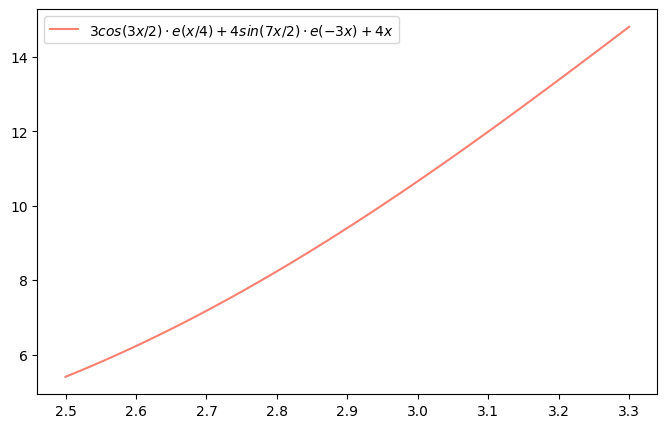

In [509]:
plt.rcParams["figure.figsize"] = (8, 5)

a, b, n = 2.5, 3.3, 100
nodes = np.linspace(a, b, n)
f_val = []

for i in range(len(nodes)):
    f_val.append(f(nodes[i]))
    
plt.plot(nodes, f_val, 
         label='$3cos(3x/2)\cdot e(x/4) + 4sin(7x/2)\cdot e(-3x) + 4x$',
         color='salmon')
plt.legend(loc='best')

## Метод средних прямоугольников
Разбиваем $[a,b]$ на $n$ частей и считаем значение функции в середине каждого частичного отрезка

In [510]:
def mid_sq(num_nodes):
    """computes an approximation of the integral of f from a to b using
    the composite middle squares with n intervals"""
    a, b, n = 2.5, 3.3, num_nodes
    nodes = np.linspace(a, b, n)
    h = (b-a)/n
    int_result = 0

    for i in range(1, len(nodes)):
        int_result += f(a + (i-0.5)*h)
        
    return h*int_result

## Метод левых прямоугольников
Здесь идея та же, что и в методе средних прямоугольников — единственное отличие заключается в том, что значение функции считаем в левой точке частичного отрезка, а не в серединной

In [511]:
def left_sq(num_nodes):
    """computes an approximation of the integral of f from a to b using
    the composite left squares with n intervals"""
    a, b, n = 2.5, 3.3, num_nodes
    nodes = np.linspace(a, b, n)
    h = (b-a)/n
    int_result = 0
    
    for i in range(1, len(nodes)):
        int_result += f(a + (i-1)*h)
        
    return h*int_result

## Метод трапеции

In [512]:
def trapez(num_nodes):
    """computes an approximation of the integral of f from a to b using
    the composite trapezoidal tule with n intervals"""
    a, b, n = 2.5, 3.3, num_nodes
    nodes = np.linspace(a, b, n)
    h = (b-a)/n
    int_result = 0
    
    for i in range(1, len(nodes)):
        int_result += (f(a + h*(i-1)) + f(a + h*(i)))
    
    return 0.5*h*int_result

## Формула Симпсона

In [513]:
def simp(num_nodes):
    """computes an approximation of the integral of f from a to b using
    the composite Simpson rule with n intervals"""
    a, b, n = 2.5, 3.3, num_nodes
    nodes = np.linspace(a, b, n)
    h = (b-a)/n
    int_result = 0
    
    for i in range(1, len(nodes)):
        int_result += (f(a+h*(i-1)) + 4*f(a + (i-0.5)*h) + f(a+h*(i)))
    return (1/6)*h*int_result

In [532]:
print(mid_sq(1000), left_sq(1000), trapez(1000), simp(1000))

7.701722598370211 7.697964218123029 7.701723137350971 7.7017227780304625


## Часть 1.2. Посчитать интеграл с использованием СКФ на базе 3-x-точечных формул 
<i> 1) Ньютона-Котеса, 2) Гаусса </i> — это интерполяционные квадратурные формулы (ИКФ)
### Подынтегральная функция $F(x) = p(x)\cdot f(x)$ из своего варианта ($p(x) \not\equiv 1$):

Посчитать $$\int_{a}^{b} F(x) dx = \int_{a}^{b} p(x)\cdot f(x) dx  = \int_{2.5}^{3.3} \dfrac{f(x)}{(x-a)^{\alpha}(b-x)^{\beta}}  dx = \bigg\{ \beta = 0 \bigg\} = \int_{2.5}^{3.3} \dfrac{f(x)}{\left(x-2.5\right)^{2/3}} dx = \int_{2.5}^{3.3} \dfrac{3 \cos\left(\dfrac{3x}{2}\right) e\left(\dfrac{x}{4}\right) + 4 \sin\left(\dfrac{7x}{2}\right) e(−3x) + 4x}{\left(x-2.5\right)^{2/3}} dx $$

$$p(x)=\dfrac{1}{\left(x-2.5\right)^{2/3}} = \left(x-2.5\right)^{-2/3}$$
<u>Примечание</u>: узлы каждой малой 3-х-точечной КФ Гаусса находить с помощью <u>формул Кардано</u>.

![image](./images/СКФ.png)

![image](./images/momentum.png)

![image](./images/АСТ1.png)
![image](./images/alg.png)

### Вычисление моментов
Для начала руками посчитаем моменты $0, 1$ и $2$ порядков (потому что мы пользуемся <b>трехточечными формулами</b> — на каждом частичном интервале берется $3$ точки, $i=\overline{0,n-1}=\overline{0,3-1}=\overline{0,2}$)
$$\mu_i = \int_{2.5}^{3.3} p(x)x^i dx = \int_{2.5}^{3.3} \dfrac{x^i}{\left(x-2.5\right)^{2/3}} dx, \;\; i=\overline{0,2}$$
![image](./images/mu0mu1mu2.png)

In [515]:
def momentum(i, a, b, h):
    """Вычисление трех моментов порядков i=0, 1, 2 на 
    частичном промежутке [a, b]"""
    res0, res1, res2 = 0, 0, 0
    h = h
    
    res0 = ((b - 2.5)**(1-(2/3)) - (a - 2.5)**(1-(2/3))) / (1-(2/3))
    res1 = (((b - 2.5)**(2-(2/3)) - (a - 2.5)**(2-(2/3))) / (2-(2/3))) + 2.5*res0
    res2 = (((b - 2.5)**(3-(2/3)) - (a - 2.5)**(3-(2/3))) / (3-(2/3))) + 2*2.5*res1 - (2.5**2)*res0
    
    if i == 0:
        return res0
    elif i == 1:
        return res1
    else:
        return res2

### СКФ Ньютона-Котеса (ИКФ с равноотстоящими узлами)

In [516]:
def newt_cot(num_nodes):
    a, b, n = 2.5, 3.3, num_nodes
    nodes = np.linspace(a, b, n)
    h = (b-a)/n
    s = 0
    
    for i in range(1, len(nodes)):
        c = np.array([
            [1, 1, 1],
            [a+(i-1)*h, a+(i-0.5)*h, a+i*h],
            [(a+(i-1)*h)**2, (a+(i-0.5)*h)**2, (a+i*h)**2]
        ])
        
        mu_vec = np.array([
            [momentum(0, a+(i-1)*h, a+(i)*h, h)],
            [momentum(1, a+(i-1)*h, a+(i)*h, h)],
            [momentum(2, a+(i-1)*h, a+(i)*h, h)]
        ])

        A = np.linalg.solve(c, mu_vec)

        s += (A[0]*f(a+(i-1)*h) + A[1]*f(a+(i-0.5)*h) + A[2]*f(a+i*h))

    return s

In [526]:
newt_cot(2500)

array([20.72477144])

### СКФ Гаусса (КФНАСТ — ИКФ с узлами, которые обеспечивают НАСТ)

![image](./images/КФНАСТ1.png)
![image](./images/КФНАСТ-alg.png)

### Формула Кардано

In [ ]:
def kardano(b,c,d,a=1):
    """y = x + b/3a"""
   
    q = 0.5*(((2*b**3)/(27*a**3)) - (b*c/3*a**2) + d/a)
    p = ((3*a*c - b**2)/(3*a**2)) / 3
    if (p >= 0) or (q**2+p**3 > 0):
        return 'there are complex roots, лох'
    if q < 0:
        r = (-1)*np.sqrt(np.abs(p))
    else:
        r = np.sqrt(np.abs(p))

    pi = 3.14159265
    
    # np.cos(phi) = q/r**3
    phi = np.arccos(q/r**3)

    y1 = -2*r*np.cos(phi/3)
    y2 = 2*r*np.cos(pi/3 - phi/3)
    y3 = 2*r*np.cos(pi/3 + phi/3)

    x=[]
    res = [y1,y2,y3]

    for _ in res:
        x.append(_ - b/3*a)
    return x

In [529]:
def momentum2(i, a, b, h):
    """Вычисление трех моментов порядков i на 
    частичном промежутке [x_i, x_{i+1}]"""
    h = h
    
    if i == 3:
        a3 = 3.21429*(a-2.5)**(7/3)+14.0625*(a-2.5)**(4/3)+0.3*(a-2.5)**(10/3)+46.875*(a-2.5)**(1/3)
        b3 = 3.21429*(b-2.5)**(7/3)+14.0625*(b-2.5)**(4/3)+0.3*(b-2.5)**(10/3)+46.875*(b-2.5)**(1/3)
        return b3-a3
    if i == 4:
        a4 = 16.0714*(a-2.5)**(7/3)+46.875*(a-2.5)**(4/3)+0.230769*(a-2.5)**(13/3)+3*(a-2.5)**(10/3)+117.188*(a-2.5)**(1/3)
        b4 = 16.0714*(b-2.5)**(7/3)+46.875*(b-2.5)**(4/3)+0.230769*(b-2.5)**(13/3)+3*(b-2.5)**(10/3)+117.188*(b-2.5)**(1/3)
        return b4-a4
    if i == 5:
        a5 = 66.9643*(a-2.5)**(7/3)+146.484*(a-2.5)**(4/3)+0.1875*(a-2.5)**(16/3)+2.88462*(a-2.5)**(13/3)+18.75*(a-2.5)**(10/3)+292.969*(a-2.5)**(1/3)
        b5 = 66.9643*(b-2.5)**(7/3)+146.484*(b-2.5)**(4/3)+0.1875*(b-2.5)**(16/3)+2.88462*(b-2.5)**(13/3)+18.75*(b-2.5)**(10/3)+292.969*(b-2.5)**(1/3)
        return b5-a5

#     S = 0
#     for k in range(i):
#         S += h*((((-1)**k)*math.comb(i, k)*((point+2*h-2.5)**(i-k))*(-2.5)**k)/(3*i-3*k+1))*(3*(point+2*h-2.5)**(1/3)) - (((-1)**k)*math.comb(i, k)*(((point-2.5)**(i-k))*(-2.5)**k)/(3*i-3*k+1))*(3*(point-2.5)**(1/3)) 
#     S += h*((((-1)**k)*math.comb(i, k)*((point+2*h-2.5)**(i-k))*(-2.5)**k)/(3*i-3*k+1))*(3*(point+2*h-2.5)**(1/3)) - (((-1)**k)*math.comb(i, k)*(((point-2.5)**(i-k))*(-2.5)**k)/(3*i-3*k+1))*(3*(point-2.5)**(1/3)) 
#     return S

In [530]:
def gauss(num_nodes):
    a, b, n = 2.5, 3.3, num_nodes
    nodes = np.linspace(a, b, n)
    h = (b-a)/n
    s = 0
    
    for i in range(1, len(nodes)):
#         1) посчитать моменты
        mu0 = momentum(0, a+(i-1)*h, a+(i)*h, h)
        mu1 = momentum(1, a+(i-1)*h, a+(i)*h, h)
        mu2 = momentum(2, a+(i-1)*h, a+(i)*h, h)
        
        mu3 = momentum2(3, a+(i-1)*h, a+(i)*h, h)
        mu4 = momentum2(4, a+(i-1)*h, a+(i)*h, h)
        mu5 = momentum2(5, a+(i-1)*h, a+(i)*h, h)
#         TODO: пересчитать моменты 3-5 порядков
        
        c = np.array([
            [mu0, mu1, mu2],
            [mu1, mu2, mu3],
            [mu2, mu3, mu4]
        ])  
        
        mu_vec = np.array([
            [-mu3],
            [-mu4],
            [-mu5]
        ])
#         2) вычислить a_j через СЛАУ
        a = np.linalg.solve(c, mu_vec)
        print(a)
        
#         3) найти узлы как корни кубического ур-я с коэффициентами a_j из 2) — по формулам Кардано
        nodes = kardano(float(a[0]), float(a[1]), float(a[2]))
        print(nodes)
        
#         4)
        C = np.array([
            [1, 1, 1],
            [float(nodes[0]), float(nodes[1]), float(nodes[2])],
            [float(nodes[0])**2, float(nodes[1])**2, float(nodes[2])**2],
        ])
        
        Mu_vec = np.array([
            [momentum(0, a+(i-1)*h, a+(i)*h, h)],
            [momentum(1, a+(i-1)*h, a+(i)*h, h)],
            [momentum(2, a+(i-1)*h, a+(i)*h, h)]
        ])

        A = np.linalg.solve(c, mu_vec)

        s += (A[0]*f(a+(i-1)*h) + A[1]*f(a+(i-0.5)*h) + A[2]*f(a+i*h))

    return s

In [531]:
gauss(10)

[[ 62.84202551]
 [-42.9115932 ]
 [  4.61166372]]
[-63.51874224966935, 0.543012248353353, 0.13370458319727518]


/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_49457/3985019338.py:7: RuntimeWarning: invalid value encountered in power
  res0 = ((b - 2.5)**(1-(2/3)) - (a - 2.5)**(1-(2/3))) / (1-(2/3))
/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_49457/3985019338.py:8: RuntimeWarning: invalid value encountered in power
  res1 = (((b - 2.5)**(2-(2/3)) - (a - 2.5)**(2-(2/3))) / (2-(2/3))) + 2.5*res0
/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_49457/3985019338.py:9: RuntimeWarning: invalid value encountered in power
  res2 = (((b - 2.5)**(3-(2/3)) - (a - 2.5)**(3-(2/3))) / (3-(2/3))) + 2*2.5*res1 - (2.5**2)*res0
/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_49457/3080977628.py:11: RuntimeWarning: invalid value encountered in power
  a4 = 16.0714*(a-2.5)**(7/3)+46.875*(a-2.5)**(4/3)+0.230769*(a-2.5)**(13/3)+3*(a-2.5)**(10/3)+117.188*(a-2.5)**(1/3)
/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_49457/3080977628.py:12: RuntimeWarning: inval

LinAlgError: Last 2 dimensions of the array must be square

## Часть 1.3. Для каждой квадратурной формулы из частей 1.1 — 1.2 нарисовать график зависимости абсолютной погрешности от количества разбиений интервала интегрирования

### График для части 1.1

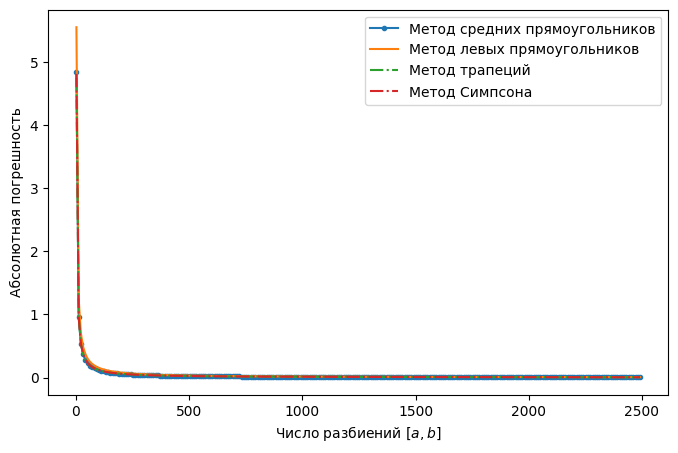

In [146]:
v1,v2,v3,v4=[],[],[],[]
ii=[]
# integrate (3*cos(3*x/2)*exp(x/4) + 4*sin(7*x/2)*exp(-3*x) + 4*x) dx from 2.5 to 3.3
for i in range(2, 2500, 10):
    ii.append(i)
    v1.append(7.71357-mid_sq(i))
    v2.append(7.71357-left_sq(i))
    v3.append(7.71357-trapez(i))
    v4.append(7.71357-simp(i))

fig = plt.figure()
fig.size = (1,5)
plt.plot(ii, v1, '.-', label='Метод средних прямоугольников')
plt.plot(ii, v2, '-', label='Метод левых прямоугольников')
plt.plot(ii, v3, '-.', label='Метод трапеций')
plt.plot(ii, v4, '-.', label='Метод Симпсона')
plt.xlabel('Число разбиений $[a, b]$')
plt.ylabel('Абсолютная погрешность')
plt.legend(loc='best')
plt.show()

### График для части 1.2

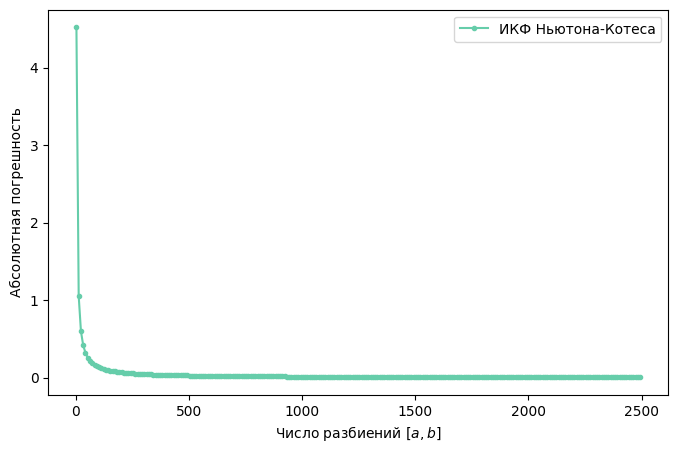

In [505]:
v1,v2=[],[]
ii=[]
# integrate (3*cos(3*x/2)*exp(x/4) + 4*sin(7*x/2)*exp(-3*x) + 4*x)/(x-2.5)^(2/3) dx from 2.5 to 3.3
for i in range(3, 2500, 10):
    ii.append(i)
    v1.append(20.7303-newt_cot(i))
#     v2.append(20.7303-left_sq(i))

fig = plt.figure()

plt.plot(ii, v1, '.-', label='ИКФ Ньютона-Котеса', color='mediumaquamarine')
# plt.plot(ii, v2, '-', label='ИКФ Гаусса')

plt.xlabel('Число разбиений $[a, b]$')
plt.ylabel('Абсолютная погрешность')
plt.legend(loc='best')
plt.show()

# Часть 2. Методы оценки погрешности составных квадратурных формул

### Часть 2.1. Посчитать интеграл с заданной точностью $\varepsilon = 10^{-6}$ c использованием 3-х-точечной СКФ Ньютона-Котеса. Погрешность оценивать методом Ричардсона. На каждых последовательных трех точках оценивать скорость сходимости по правилу Эйткена. Указать длину шага $h$ разбиения интервала интегрирования, при котором была достигнута требуемая точность $\varepsilon$.

### Часть 2.2. Повторить часть 2.1, используя 3-х-точечные формулы Гаусса вместо формул Ньютона-Котеса.

### Часть 2.3. Проведя вычисления (для одной из построенных КФ из частей 2.1 — 2.2) по трем сеткам с малым числом шагов (например, 1, 2, 4) и испольщуя оценку скорости сходимости по Эйткену, выбрать шаг $h_{opt}$. Начать рассчет с полученного шага и снова довести вычисления интеграла до требуемой точности $\varepsilon$. Указать шаг разбиения интеравала интегрирования, при котором достигнута требуемая точность, и сравнить его с шагом, вычисленным в частях 2.1 (или 2.2) — в зависимости от того, какую КФ выбираем для выполения части 2.3)